# mark jeju hot place in map

## 1. data preparation

In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving jejuhotplace.csv to jejuhotplace.csv


In [5]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [6]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [7]:
location_counts.tail()

,place
제주도 표선,1
"Oslob, Cebu",1
카페닐스,1
내츄럴케이,1
관음사,1


In [8]:
location_counts.to_csv('location_counts.csv')

In [10]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명', '빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


### 2. search location with kakao api key

- search keyword location

In [11]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [12]:
with open(filename) as f:
  api_key = f.read()

In [13]:
import requests
from urllib.parse import quote

In [27]:
keyword = '합정 스타벅스'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result['documents'][0]

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [32]:
import numpy as np
import re

In [29]:
def find_place(keyword):
  url = f'{search_url}?query={quote(keyword)}'
  result = requests.get(url,
              headers={"Authorization": f'KakaoAK {api_key}'}).json()
  try:
    name = result['documents'][0]['place_name']
    if '제주특별자치도' not in result['documents'][0]['address_name']:
      lng = np.nan
      lat = np.nan
    else:
      lng = float(result['documents'][0]['x'])
      lat = float(result['documents'][0]['y'])
  except:
    print(keyword)
    name = '',
    lng = np.nan,
    lat = np.nan
  return name, lng, lat, keyword

In [30]:
find_place('제주공항')

('제주국제공항', 126.492769004244, 33.5070789578184, '제주공항')

In [34]:
re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '', '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地') # exclude not hangul, number, space

'제주도 서귀포 중문관광단지 '

In [35]:
# add lng, lat to loc_cf
name_list, lng_list, lat_list = [], [], []
for place in loc_df.지명:
  place = re.sub('[^가-힣0-9 ]', '', place).strip()
  if place:
    name, lng, lat, _ = find_place(place)
  else:
    name, lng, lat = '', np.nan, np.nan
  name_list.append(name)
  lng_list.append(lng)
  lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
제주 성산 신산포구자연산횟집 회포장
성산일출봉 게스트하우스 파티 띵까게스트하우스
해발1950 한라산 백록담
함덕반하다
아날로그감귤체험
스윗슬로
애월해안가
2월22일 브런치카페
제주 조류공원 화조원
쌀다방
제주 서귀포 그릴 데미그라스
윗세오름해발 1700
비브레이브 커피 로스터즈
빨간모자마법사
붉은못허브팜   애월본점
제스토리 바이제주 제주감성소품
목포고을 제주도 흑돼지 끝나는 맛
포근한우리집
블루밍아일랜드
유리의성과마법의숲
서귀동 2985 세계의 가정식
더커피브루
라비에 와인비스트로
제주도가는 비행기 안
소자38
성산수구레국밥
비양도 해녀촌
해물뚝배기전문 재암식당
제주아트리움비밀의그림자공연
오마주마카롱
테라로사이사랑
카페 하도섬
8월의크리스마스 초원사진관
기원뚝배기
제주카페 스르륵
미미본가
건축카페  섶섬이보이는
여수 앞바다
카페하도섬엠스테이펜션
미나마라
새우조나단
머스태쉬커피머스태쉬하우스
다만프레르제주신화점
유민 아르누보 콜렉션
한복입는 선흘집
제주마라도잠수함
목수금토일
카페바띠
블랙하우스 떡볶이레스토랑
동탄2에 산다
협제 혜변
제주도 올레길 6코스 이중섭거리
김녕 앞바다
접대  저번에 우리가 만났던 그때
몽키비치
몽구네민박
큰엉전망대쉼터
블루마린하우스
핸드테일러 제주점
청초수물회섭국 신관
헤이미쉬제주제주독채펜션
미풍해장국  중앙점
제주 반디앤로제이 펜션  플라워브런치카페
타시텔레
오샹띠
새별오름 정상
빌리엔젤 제주노형점
제주초가집 곱들락
평화통일불사리탑사
섶섬해녀할망카페
유채꽃사진촬영소
성산일출봉 코앞 쉼터
인공위성 제주
단디501
선화동1061
곽지스테이션
모던플레이스 리조트
홍대 깐풍기브라더스
군산 정상
알뜨르프로젝트2018
제주도 하늘 위
릴리펏 제주점 메종글래드호텔
의 한모신의 한모
한라산 정상 해발 1950
돈테일러익스프레
정방폭포가 보이는 암벽위
기쁨이네 감자탕
저녁정원
원더먼트제주
제주신화월드 메리어트 리조트관
풍원 한라산볶음밥
바굥식당
중문 마린파크 퍼시픽랜드
백리향백반
네

In [36]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.328


In [37]:
# check null data
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도       95
dtype: int64

In [44]:
# remove null data
total_df = loc_df.dropna() # remove row with null
total_df.isnull().sum()

지명      0
빈도      0
공식명칭    0
위도      0
경도      0
dtype: int64

In [45]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.328
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.941
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919
9,1100고지,25,한라산1100고지,33.358078,126.462


### 3. 공식명칭으로 merge data

In [46]:
# Whether the official name is duplicated
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
함덕해수욕장                4
동문재래시장                4
제주중문관광단지              3
한라산국립공원               3
비자림                   3
협재해수욕장                3
이호테우해수욕장              3
천지연폭포                 3
우도                    3
Name: 공식명칭, dtype: int64

In [47]:
df = df.pivot_table(index=['공식명칭', '위도', '경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
40계단,35.103911,129.034571,1
702키친,33.498835,126.534134,1
CU 수원광장점,37.268151,127.000311,1
KT 브로 라페스타점,37.662346,126.767821,1


In [48]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

탐나버거       1
춘심이네 본점    1
거멍국수       1
함덕해수욕장     1
제주신화월드     1
Name: 공식명칭, dtype: int64

In [49]:
pivot_df.to_csv('공식명칭.csv', index=False)

## 4. folium map visualize

### 1. display individual

In [50]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
230,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
540,제주에인감귤밭,33.256561,126.539014,48
319,성산일출봉,33.459135,126.940538,38
664,폼포코식당,33.450408,126.919065,30
692,한라산1100고지,33.358078,126.462220,25
474,위미동백나무군락,33.272939,126.674731,24
472,월정리해수욕장,33.556469,126.795805,22
446,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
29,고집돌우럭 중문점,33.257981,126.416705,21
725,협재해수욕장,33.393866,126.239158,20


In [55]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


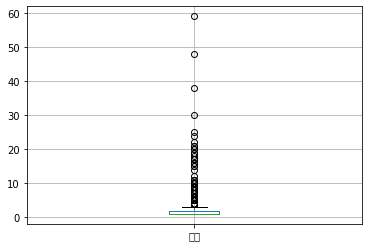

In [56]:
df[['빈도']].boxplot()

In [57]:
import folium

In [71]:
type(df.빈도[0]*2)

numpy.int64

In [75]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
  folium.CircleMarker(
      radius=float(df.빈도[i]),              # int64 처리 불가
      location=[df.위도[i], df.경도[i]],
      popup=df.공식명칭[i],
      tooltip=df.공식명칭[i],
      color='crimson'
  ).add_to(map)
map

### 2. mark as a group

In [76]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
  locations.append([df.위도[i], df.경도[i]])
  names.append(df.공식명칭[i])

In [77]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations,
    popups=names,
    name='제주',
    overlay=True,
    control=True
).add_to(map)

map